In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pandas.read_csv("result.txt", delimiter="|")
data_clean = data.drop(columns=["query-type", "from(ms)", "to(ms)", "verify", "count-only"])
# data_clean = data.drop(data_clean[(data_clean["Part.-Strat."] == "default") & (data_clean["Partitioned Field"] != "id")].index)
groups = data_clean.groupby(data.Type)
data_snapshot = groups.get_group("Snapshot")
data_snapshot = data_snapshot.groupby(data_snapshot.dataset)
data_pattern_matching = groups.get_group("PatternMatching")
data_pattern_matching = data_pattern_matching.groupby(data_pattern_matching.dataset)

In [3]:
def plot_bar_overview(df, labels, name):
    x=np.arange(len(labels))
    w = 0.8
    fig, ax = plt.subplots()

    rects=list()
    n= len(df.Parallelism.groups)
    i= 1-n/2

    for group in df.Parallelism.groups:
        data = df.get_group(group)
        barchart = ax.bar(x-(w/n)*i, data['Runtime(s)'].tolist(), w/n, label=group[1]+ "|" + group[0])
        # ax.bar_label(barchart)
        rects.append(barchart)
        i+=1

    ax.set_ylabel('Runtime(s)')
    ax.set_xlabel('Parallelism')
    ax.set_xticks(x, labels)
    ax.legend()
    # for rect in rects:
    #     ax.bar_label(rect, padding=3)
    plt.show()
    plt.savefig( name + ".svg", format="svg")

Snapshot

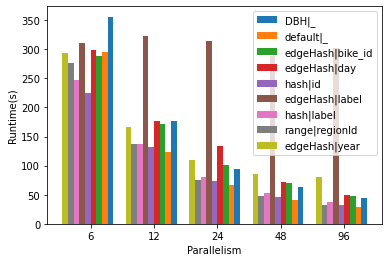

<Figure size 432x288 with 0 Axes>

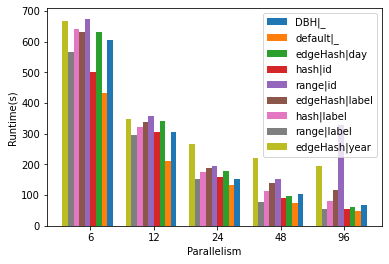

<Figure size 432x288 with 0 Axes>

In [4]:
### Citibike
labels = ['6','12','24','48', '96']
data_snapshot_citibike = data_snapshot.get_group("hdfs:///user/kretschmer/citibike")
data_snapshot_citibike = data_snapshot_citibike.groupby(["Partitioned Field", "Part.-Strat."])
plot_bar_overview(data_snapshot_citibike, labels, "Citibike_Snap")

### ldbc
data_snapshot_ldbc = data_snapshot.get_group("hdfs:///user/kretschmer/ldbc10")
data_snapshot_ldbc = data_snapshot_ldbc.groupby(["Partitioned Field", "Part.-Strat."])
plot_bar_overview(data_snapshot_ldbc, labels, "LDBC_Snap")

Pattern Matching

Citibike 1.0


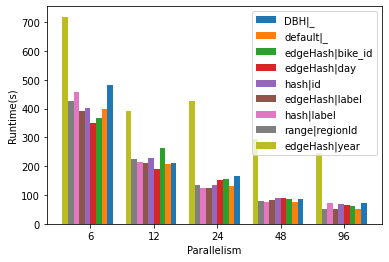

Citibike 2.0


<Figure size 432x288 with 0 Axes>

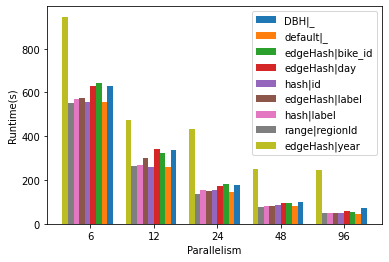

Citibike 3.0


<Figure size 432x288 with 0 Axes>

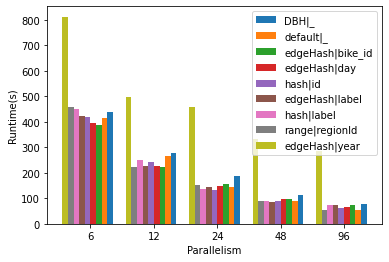

LDBC 4.0


<Figure size 432x288 with 0 Axes>

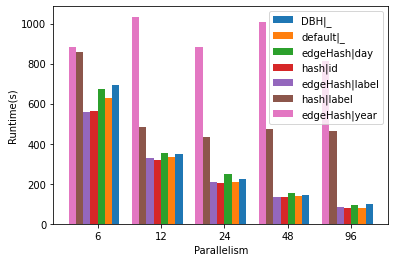

LDBC 5.0


<Figure size 432x288 with 0 Axes>

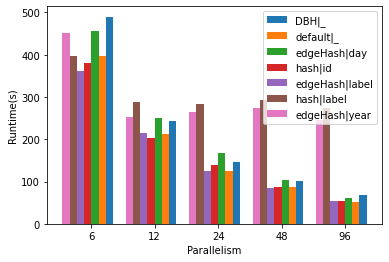

LDBC 6.0


<Figure size 432x288 with 0 Axes>

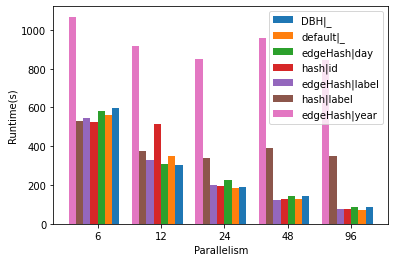

<Figure size 432x288 with 0 Axes>

In [6]:
labels = ['6','12','24','48', '96']

data_pm_citibike = data_pattern_matching.get_group("hdfs:///user/kretschmer/citibike")
data_pm_citibike = data_pm_citibike.groupby(["Query"])
for query in data_pm_citibike.groups:
    print("Citibike", query)
    data_pm_citibike_query = data_pm_citibike.get_group(query);
    data_pm_citibike_query = data_pm_citibike_query.groupby(["Partitioned Field", "Part.-Strat."])
    plot_bar_overview(data_pm_citibike_query, labels, "Citibike_"+ str(query))


### ldbc
data_pm_ldbc = data_pattern_matching.get_group("hdfs:///user/kretschmer/ldbc10")
data_pm_ldbc = data_pm_ldbc.groupby(["Query"])
for query in data_pm_ldbc.groups:
    print("LDBC", query)
    data_pm_ldbc_query = data_pm_ldbc.get_group(query);
    data_pm_ldbc_query = data_pm_ldbc_query.groupby(["Partitioned Field", "Part.-Strat."])
    plot_bar_overview(data_pm_ldbc_query, labels, "LDBC_"+ str(query))